# Subject: Advanced Data Analysis

# Module: Geospatial Analysis

## Session 5 - Geographic Analysis of Social Network Data 

### Demo 2 -  Geospatial clustering of sentimental analysis on user tweets using Python 

The requirements that we'll need to install are:

- NumPy: This is the fundamental package for scientific computing with Python. Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data.
- Pandas: This is an open source library providing high-performance, easy-to-use data structures and data analysis tools.
- Tweepy: This is an easy-to-use Python library for accessing the Twitter API.
- Matplotlib: This is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
- Seaborn: This is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
- Textblob: This is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks.

https://textblob.readthedocs.io/en/dev/

$ pip install -U textblob

$ python -m textblob.download_corpora

https://github.com/tweepy/tweepy

$ pip install tweepy

## 1. Extracting twitter data (tweepy + pandas)

### 1.1. Importing our libraries

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2. Creating a Twitter App

In order to extract tweets for a posterior analysis, we need to access to our Twitter account and create an app. The website to do this is https://apps.twitter.com/

From this app that we're creating we will save the following information:

- Consumer Key (API Key)

- Consumer Secret (API Secret)

- Access Token

- Access Token Secret


In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'Uu3D2hHGljVnU2vchDYmHZtGw'
CONSUMER_SECRET = 'aUfG03L1ZUQjojGK1dQ6dKFC8nktUZQZ4eZDU3p23hEA8ZQus3'

# Access:
ACCESS_TOKEN  = '955416286477082625-85nByhWARuuQQJt2QyfFwublVbSE28L'
ACCESS_SECRET = 'DWARKyhsQKwm1aVWiTsS8RjKQGy778iaERGHeKnauB9Sb'

In [3]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    # Return API with authentication:
    api = tweepy.API(auth)
    return api

### 1.3. Tweets extraction

Now that we've created a function to setup the Twitter API, we can use this function to create an "extractor" object. After this, we will use Tweepy's function extractor.user_timeline(screen_name, count) to extract from screen_name's user the quantity of count tweets.

As it is mentioned in the title, I've chosen @KRLS as the user to extract data for a posterior analysis. The way to extract Twitter's data is as follows:

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="FRSGutierres", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 6.

5 recent tweets:

Geospatial Data analysis promises a potential transformation of coastal management and planning - BigDataBCNBigData… https://t.co/TEViz7oIBS

Sempre numa correria. https://t.co/A9lQBmF3GE

Healthy back to home. https://t.co/p6QDqEipxb

Primeiro tweet no telemóvel.

A place to visit.



We now have an extractor and extracted data, which is listed in the tweets variable. I must mention at this point that each element in that list is a tweet object from Tweepy.

### 1.4. Creating a (pandas) DataFrame

We now have initial information to construct a pandas DataFrame, in order to manipulate the info in a very easy way.

In [5]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Geospatial Data analysis promises a potential ...
1,Sempre numa correria. https://t.co/A9lQBmF3GE
2,Healthy back to home. https://t.co/p6QDqEipxb
3,Primeiro tweet no telemóvel.
4,A place to visit.
5,Working with motivation on Twitter spatial ana...


An interesting thing is the number if internal methods that the tweetstructure has in Tweepy:

In [6]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. 

In [7]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)
print(tweets[0].place)

956151388853202944
2018-01-24 13:07:10
Twitter Web Client
0
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/TEViz7oIBS', 'expanded_url': 'https://twitter.com/i/web/status/956151388853202944', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}
None


In [8]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['coordinates']    = np.array([tweet.coordinates for tweet in tweets])
data['places']    = np.array([tweet.place for tweet in tweets])

In [9]:
data

,Tweets,len,ID,Date,Source,Likes,coordinates,places
0,Geospatial Data analysis promises a potential ...,140,956151388853202944,2018-01-24 13:07:10,Twitter Web Client,0,None,None
1,Sempre numa correria. https://t.co/A9lQBmF3GE,45,955858136438640641,2018-01-23 17:41:53,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1940061, 4...",Place(_api=<tweepy.api.API object at 0x0000000...
2,Healthy back to home. https://t.co/p6QDqEipxb,45,955842258485547008,2018-01-23 16:38:47,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1979555, 4...",Place(_api=<tweepy.api.API object at 0x0000000...
3,Primeiro tweet no telemóvel.,28,955832736320839680,2018-01-23 16:00:57,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.2019244, 4...",Place(_api=<tweepy.api.API object at 0x0000000...
4,A place to visit.,17,955831134788648960,2018-01-23 15:54:35,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...
5,Working with motivation on Twitter spatial ana...,52,955830439284965376,2018-01-23 15:51:49,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...


In [10]:
# We convert the Date type:
data['timestamp'] = pd.to_datetime(data['Date'], unit='s')

In [11]:
data['timestamp'] = data['timestamp'].dt.strftime('%Y-%m-%d')

In [12]:
data

,Tweets,len,ID,Date,Source,Likes,coordinates,places,timestamp
0,Geospatial Data analysis promises a potential ...,140,956151388853202944,2018-01-24 13:07:10,Twitter Web Client,0,None,None,2018-01-24
1,Sempre numa correria. https://t.co/A9lQBmF3GE,45,955858136438640641,2018-01-23 17:41:53,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1940061, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23
2,Healthy back to home. https://t.co/p6QDqEipxb,45,955842258485547008,2018-01-23 16:38:47,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1979555, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23
3,Primeiro tweet no telemóvel.,28,955832736320839680,2018-01-23 16:00:57,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.2019244, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23
4,A place to visit.,17,955831134788648960,2018-01-23 15:54:35,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23
5,Working with motivation on Twitter spatial ana...,52,955830439284965376,2018-01-23 15:51:49,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23


## 2. Sentiment analysis

### 2.1. Importing textblob

Anyway, getting back to the code we will just add an extra column to our data. This column will contain the sentiment analysis and we can plot the dataframe to see the update:

In [13]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

https://link.springer.com/chapter/10.1007/978-3-319-47602-5_40

In [14]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,coordinates,places,timestamp,SA
0,Geospatial Data analysis promises a potential ...,140,956151388853202944,2018-01-24 13:07:10,Twitter Web Client,0,None,None,2018-01-24,0
1,Sempre numa correria. https://t.co/A9lQBmF3GE,45,955858136438640641,2018-01-23 17:41:53,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1940061, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
2,Healthy back to home. https://t.co/p6QDqEipxb,45,955842258485547008,2018-01-23 16:38:47,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1979555, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,1
3,Primeiro tweet no telemóvel.,28,955832736320839680,2018-01-23 16:00:57,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.2019244, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
4,A place to visit.,17,955831134788648960,2018-01-23 15:54:35,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
5,Working with motivation on Twitter spatial ana...,52,955830439284965376,2018-01-23 15:51:49,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0


In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
data

,Tweets,len,ID,Date,Source,Likes,coordinates,places,timestamp,SA
0,Geospatial Data analysis promises a potential ...,140,956151388853202944,2018-01-24 13:07:10,Twitter Web Client,0,None,None,2018-01-24,0
1,Sempre numa correria. https://t.co/A9lQBmF3GE,45,955858136438640641,2018-01-23 17:41:53,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1940061, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
2,Healthy back to home. https://t.co/p6QDqEipxb,45,955842258485547008,2018-01-23 16:38:47,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1979555, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,1
3,Primeiro tweet no telemóvel.,28,955832736320839680,2018-01-23 16:00:57,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.2019244, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
4,A place to visit.,17,955831134788648960,2018-01-23 15:54:35,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
5,Working with motivation on Twitter spatial ana...,52,955830439284965376,2018-01-23 15:51:49,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0


In [17]:
data.dtypes

Tweets                 object
len                     int32
ID                      int64
Date           datetime64[ns]
Source                 object
Likes                   int32
coordinates            object
places                 object
timestamp              object
SA                      int32
dtype: object

https://galeascience.wordpress.com/2016/03/18/collecting-twitter-data-with-python/

### 2.2. Analyzing the results

#### 2.2.1. Calculation of the percentage of the classified tweets

In [18]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [19]:
pos_tweets

['Healthy back to home. https://t.co/p6QDqEipxb']

In [20]:
neu_tweets

['Geospatial Data analysis promises a potential transformation of coastal management and planning - BigDataBCNBigData… https://t.co/TEViz7oIBS',
 'Sempre numa correria. https://t.co/A9lQBmF3GE',
 'Primeiro tweet no telemóvel.',
 'A place to visit.',
 'Working with motivation on Twitter spatial analysis.']

In [21]:
neg_tweets

[]

Now that we have the lists, we just print the percentages:

In [22]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 16.666666666666668%
Percentage of neutral tweets: 83.33333333333333%
Percentage de negative tweets: 0.0%


#### 2.2.2. Infographics of the tweets

In [24]:
# Pandas DataFrame with the Sentiment Analysis results
data.head()

,Tweets,len,ID,Date,Source,Likes,coordinates,places,timestamp,SA
0,Geospatial Data analysis promises a potential ...,140,956151388853202944,2018-01-24 13:07:10,Twitter Web Client,0,None,None,2018-01-24,0
1,Sempre numa correria. https://t.co/A9lQBmF3GE,45,955858136438640641,2018-01-23 17:41:53,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1940061, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
2,Healthy back to home. https://t.co/p6QDqEipxb,45,955842258485547008,2018-01-23 16:38:47,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1979555, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,1
3,Primeiro tweet no telemóvel.,28,955832736320839680,2018-01-23 16:00:57,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.2019244, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
4,A place to visit.,17,955831134788648960,2018-01-23 15:54:35,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0


In [25]:
# New Pandas DataFrame with a new name of the field including the Sentiment Analysis results (SA)
df1=data.rename(columns={'SA':'Polarity'})
df1.head()

,Tweets,len,ID,Date,Source,Likes,coordinates,places,timestamp,Polarity
0,Geospatial Data analysis promises a potential ...,140,956151388853202944,2018-01-24 13:07:10,Twitter Web Client,0,None,None,2018-01-24,0
1,Sempre numa correria. https://t.co/A9lQBmF3GE,45,955858136438640641,2018-01-23 17:41:53,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1940061, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
2,Healthy back to home. https://t.co/p6QDqEipxb,45,955842258485547008,2018-01-23 16:38:47,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1979555, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,1
3,Primeiro tweet no telemóvel.,28,955832736320839680,2018-01-23 16:00:57,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.2019244, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
4,A place to visit.,17,955831134788648960,2018-01-23 15:54:35,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0


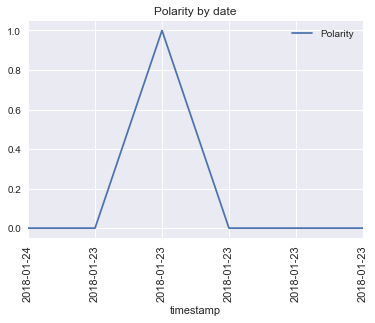

In [26]:
# Graph of the Polarity by date (2018)
df1.plot( kind='line', x='timestamp', y='Polarity',title='Polarity by date')
axes = plt.gca()
plt.xticks(rotation='vertical', fontsize=11)
plt.show()

In [27]:
# Graph of the Polarity by hour for a specific day
df1['Hour'] = pd.to_datetime(df1['Date'], format='%H:%M').dt.hour # to create a new column with the hour information
df1.head()

,Tweets,len,ID,Date,Source,Likes,coordinates,places,timestamp,Polarity,Hour
0,Geospatial Data analysis promises a potential ...,140,956151388853202944,2018-01-24 13:07:10,Twitter Web Client,0,None,None,2018-01-24,0,13
1,Sempre numa correria. https://t.co/A9lQBmF3GE,45,955858136438640641,2018-01-23 17:41:53,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1940061, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0,17
2,Healthy back to home. https://t.co/p6QDqEipxb,45,955842258485547008,2018-01-23 16:38:47,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1979555, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,1,16
3,Primeiro tweet no telemóvel.,28,955832736320839680,2018-01-23 16:00:57,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.2019244, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0,16
4,A place to visit.,17,955831134788648960,2018-01-23 15:54:35,Twitter Web Client,0,None,Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0,15


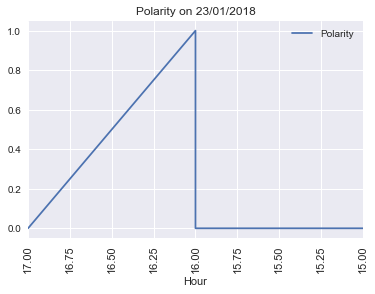

In [28]:
df2 = df1[df1['timestamp'] == '2018-01-23']
df2.plot( kind='line', x='Hour', y='Polarity',title='Polarity on 23/01/2018')
axes = plt.gca()
plt.xticks(rotation='vertical', fontsize=11)
plt.show()

## 3. Data formating

Select the records with coordinates and split the longitude and latitude for two new columns.

In [33]:
data2=data.iloc[1:4]
data2

,Tweets,len,ID,Date,Source,Likes,coordinates,places,timestamp,SA
1,Sempre numa correria. https://t.co/A9lQBmF3GE,45,955858136438640641,2018-01-23 17:41:53,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1940061, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0
2,Healthy back to home. https://t.co/p6QDqEipxb,45,955842258485547008,2018-01-23 16:38:47,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1979555, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,1
3,Primeiro tweet no telemóvel.,28,955832736320839680,2018-01-23 16:00:57,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.2019244, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0


In [34]:
data2['lat'] = data2.coordinates.apply(lambda x:x['coordinates'][1])
data2['lon'] = data2.coordinates.apply(lambda x:x['coordinates'][0])

C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [35]:
data2

,Tweets,len,ID,Date,Source,Likes,coordinates,places,timestamp,SA,lat,lon
1,Sempre numa correria. https://t.co/A9lQBmF3GE,45,955858136438640641,2018-01-23 17:41:53,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1940061, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0,41.414305,2.194006
2,Healthy back to home. https://t.co/p6QDqEipxb,45,955842258485547008,2018-01-23 16:38:47,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.1979555, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,1,41.405226,2.197955
3,Primeiro tweet no telemóvel.,28,955832736320839680,2018-01-23 16:00:57,Twitter for Android,0,"{'type': 'Point', 'coordinates': [2.2019244, 4...",Place(_api=<tweepy.api.API object at 0x0000000...,2018-01-23,0,41.404459,2.201924


In [36]:
data2.dtypes

Tweets                 object
len                     int32
ID                      int64
Date           datetime64[ns]
Source                 object
Likes                   int32
coordinates            object
places                 object
timestamp              object
SA                      int32
lat                   float64
lon                   float64
dtype: object

In [38]:
#We must convert the Polarity to string to be used as a map attribute
data2.SA = data2.SA.astype(str)

C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [39]:
data2.dtypes

Tweets                 object
len                     int32
ID                      int64
Date           datetime64[ns]
Source                 object
Likes                   int32
coordinates            object
places                 object
timestamp              object
SA                     object
lat                   float64
lon                   float64
dtype: object

In [40]:
#We can select the useful atributes and create a new dataframe
useful_cols = ['Tweets', 'Source', 'timestamp', 'SA', 'lat', 'lon']
data3 = data2[useful_cols]
data3

,Tweets,Source,timestamp,SA,lat,lon
1,Sempre numa correria. https://t.co/A9lQBmF3GE,Twitter for Android,2018-01-23,0,41.414305,2.194006
2,Healthy back to home. https://t.co/p6QDqEipxb,Twitter for Android,2018-01-23,1,41.405226,2.197955
3,Primeiro tweet no telemóvel.,Twitter for Android,2018-01-23,0,41.404459,2.201924


## 4. Convert to Geodataframe

In [42]:
import geopandas as gpd

In [43]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
data3['geometry'] = data3.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)

C:\Users\francisco.sacramento\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
data4 = gpd.GeoDataFrame(data3, geometry='geometry')

In [45]:
data4

,Tweets,Source,timestamp,SA,lat,lon,geometry
1,Sempre numa correria. https://t.co/A9lQBmF3GE,Twitter for Android,2018-01-23,0,41.414305,2.194006,POINT (2.1940061 41.4143054)
2,Healthy back to home. https://t.co/p6QDqEipxb,Twitter for Android,2018-01-23,1,41.405226,2.197955,POINT (2.1979555 41.4052265)
3,Primeiro tweet no telemóvel.,Twitter for Android,2018-01-23,0,41.404459,2.201924,POINT (2.2019244 41.404459)


In [46]:
type(data4)

geopandas.geodataframe.GeoDataFrame

In [47]:
# proj WGS84

data4.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

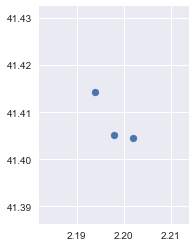

In [48]:
%matplotlib inline
data4.plot()

In [49]:
# export the Geodataframe as shapefile
data4.to_file('Twitters_FSGutierres.shp', driver='ESRI Shapefile')

## 6. Webmapping of Tweets with Folium

### 6.1. GeoClustering of tweets

We will use the Folium Marker Clusters. What is?

Marker clusters can be a good way to simply a map containing many markers (like in Demo 1). When the map is zoomed out nearby markers are combined together into a cluster, which is separated out when the map zoom level is closer.

In [52]:
import folium
from folium.plugins import MarkerCluster
from folium import IFrame

In [53]:
#Create Twitter basemap specifying map center, zoom level, and using the CartoDB Positron tiles
Twitter_map = folium.Map([45.955263, 8.935129], tiles='cartodbdark_matter', zoom_start = 5)
Twitter_map

In [54]:
def add_point_clusters(mapobj, gdf, popup_field_list):
    #Create empty lists to contain the point coordinates and the point pop-up information
    coords, popups = [], [] 
    #Loop through each record in the GeoDataFrame
    for i, row in gdf.iterrows():
        #Append lat and long coordinates to "coords" list
        coords.append([row.geometry.y, row.geometry.x])
        #Create a string of HTML code used in the IFrame popup
        #Join together the fields in "popup_field_list" with a linebreak between them
        label = '<br>'.join([row[field] for field in popup_field_list])
        #Append an IFrame that uses the HTML string to the "popups" list 
        popups.append(IFrame(label, width = 500, height = 300))
        
    #Create a Folium feature group for this layer, since we will be displaying multiple layers
    pt_lyr = folium.FeatureGroup(name = 'Twiter_Clustered')
    
    #Add the clustered points of crime locations and popups to this layer
    pt_lyr.add_child(MarkerCluster(locations = coords, popups = popups))
    
    #Add this point layer to the map object
    mapobj.add_child(pt_lyr)
    return mapobj

#Update map with point clusters
Twitter_map2 = add_point_clusters(Twitter_map, data4, ['Tweets','Source', 'timestamp', 'SA'])
Twitter_map2

In [55]:
#save the map as a webapp
Twitter_map2.save('Twitter_FSGutierres_map.html') #save HTML

## 7. Webmapping of Tweets with the QuantumGIS Cloud (Web-GIS platform)

Publish the shapefile in QuantumGIS Cloud and create a webmap. Open the QuantumGIS and install the "QGIS Cloud" Plugin.

https://qgiscloud.com/